<a href="https://colab.research.google.com/github/AbhinandanRoy7/Project/blob/main/StockPricePredictionLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/NSE-TATAGLOBAL.csv')

In [15]:
data.head()

,Date,Open,High,Low,Last,Close,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,7999.55


In [5]:
data.shape

(2035, 8)

In [16]:
data.drop('Turnover (Lacs)',axis=1,inplace= True)

In [17]:
data.head()

,Date,Open,High,Low,Last,Close
0,2018-09-28,234.05,235.95,230.20,233.50,233.75
1,2018-09-27,234.55,236.80,231.10,233.80,233.25
2,2018-09-26,240.00,240.00,232.50,235.00,234.25
3,2018-09-25,233.30,236.75,232.00,236.25,236.10
4,2018-09-24,233.55,239.20,230.75,234.00,233.30


In [18]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2035 non-null   object 
 1   Open    2035 non-null   float64
 2   High    2035 non-null   float64
 3   Low     2035 non-null   float64
 4   Last    2035 non-null   float64
 5   Close   2035 non-null   float64
dtypes: float64(5), object(1)
memory usage: 95.5+ KB


In [21]:
data.describe()

,Open,High,Low,Last,Close
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000
mean,149.713735,151.992826,147.293931,149.474251,149.45027
std,48.664509,49.413109,47.931958,48.732570,48.71204
min,81.100000,82.800000,80.000000,81.000000,80.95000
25%,120.025000,122.100000,118.300000,120.075000,120.05000
50%,141.500000,143.400000,139.600000,141.100000,141.25000
75%,157.175000,159.400000,155.150000,156.925000,156.90000
max,327.700000,328.750000,321.650000,325.950000,325.75000


In [22]:
len(data)

2035

<Axes: >

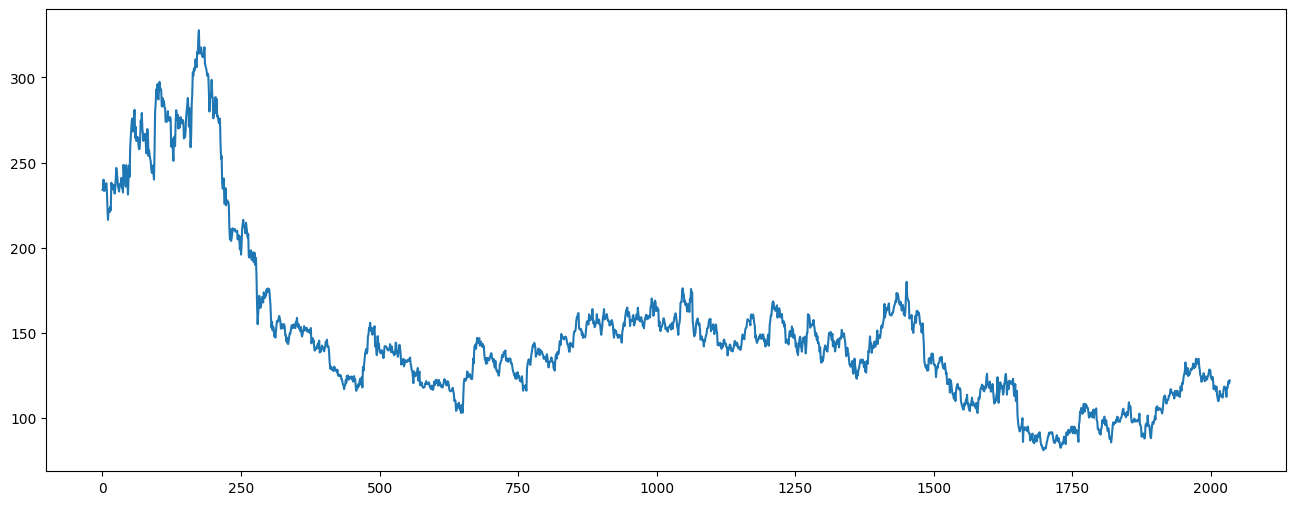

In [24]:
data['Open'].plot(figsize=(16,6))

In [26]:
X= data[['Open','High','Low','Last','Close']]
y= data['Close']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=44)

In [30]:
X_train.shape

(1526, 5)

In [31]:
X_test.shape

(509, 5)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression= LinearRegression()

In [33]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
print(regression.coef_)

[-1.64329774e-15  1.99840144e-15  9.15933995e-16 -5.55111512e-17
  1.00000000e+00]


In [35]:
print(regression.intercept_)

8.526512829121202e-14


In [36]:
prediction=regression.predict(X_test)
print(X_test)

        Open    High     Low    Last   Close
1091  152.45  153.50  146.50  149.90  149.45
785   137.80  138.50  136.15  137.25  137.45
1435  173.00  174.25  166.55  169.15  169.80
878   160.95  161.10  153.55  155.25  154.85
742   126.50  127.60  123.10  126.00  126.60
...      ...     ...     ...     ...     ...
116   273.90  277.80  271.65  273.90  273.85
557   130.50  131.95  129.45  131.60  131.20
1090  149.45  150.90  147.80  148.35  148.35
38    248.70  254.95  234.35  235.10  235.65
748   124.00  126.00  122.90  125.30  125.45

[509 rows x 5 columns]


In [37]:
prediction.shape

(509,)

In [38]:
df=pd.DataFrame(y_test,prediction)
dfr=pd.DataFrame({'Actual':y_test, 'Predicted':prediction})
dfr.head(25)

,Actual,Predicted
1091,149.45,149.45
785,137.45,137.45
1435,169.80,169.80
878,154.85,154.85
742,126.60,126.60
942,156.00,156.00
1527,120.05,120.05
1439,165.60,165.60
1288,147.65,147.65
733,132.30,132.30


In [39]:
regression.score(X_test,y_test)

1.0

In [41]:
import math
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error:  2.6914074549026977e-14


In [42]:
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,prediction))

Mean Squared Error:  9.855398920897098e-28


In [43]:
print('Root Mean Squared Error: ',math.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error:  3.139330967084722e-14


In [45]:
graph=dfr.head(25)

<Axes: >

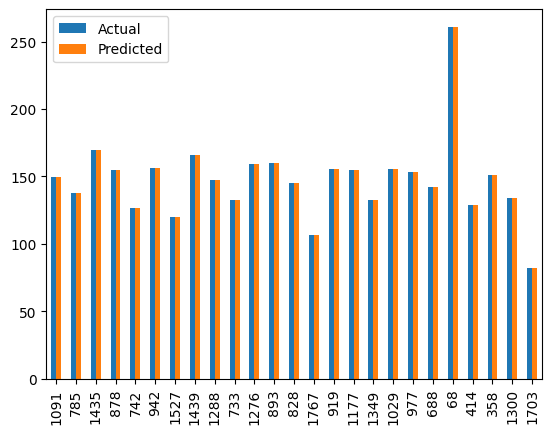

In [46]:
graph.plot(kind= 'bar')